In [1]:
import pandas as pd # to dataframes
import matplotlib.pyplot as plt #to define plot parameters
import seaborn as sns #to graphical plots
import numpy as np #to math 

plt.style.use('ggplot') 

In [4]:
df = pd.read_csv('cannabis.csv')
print(df.shape)
print(df.isnull().sum())
print(df.info())
df.head()

(2351, 6)
Strain          0
Type            0
Rating          0
Effects         0
Flavor         46
Description    33
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 6 columns):
Strain         2351 non-null object
Type           2351 non-null object
Rating         2351 non-null float64
Effects        2351 non-null object
Flavor         2305 non-null object
Description    2318 non-null object
dtypes: float64(1), object(5)
memory usage: 110.3+ KB
None


,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


In [12]:
print("Numerical describe of distribuition Type")
print(df.Type.value_counts())
print("Percentage of distribuition Type ")
print('hybrid porcentage {}'.format(((df.groupby('Type').size()[0])/(df.groupby('Type').size()[0] 
+ df.groupby('Type').size()[1] + df.groupby('Type').size()[2]))*100))
print('indica porcentage {}'.format(((df.groupby('Type').size()[1])/(df.groupby('Type').size()[0] 
+ df.groupby('Type').size()[1] + df.groupby('Type').size()[2]))*100))
print('sativa porcentage {}'.format(((df.groupby('Type').size()[2])/(df.groupby('Type').size()[0] 
+ df.groupby('Type').size()[1] + df.groupby('Type').size()[2]))*100))

Numerical describe of distribuition Type
hybrid    1212
indica     699
sativa     440
Name: Type, dtype: int64
Percentage of distribuition Type 
hybrid porcentage 51.552530837941305
indica porcentage 29.732028923862185
sativa porcentage 18.715440238196514


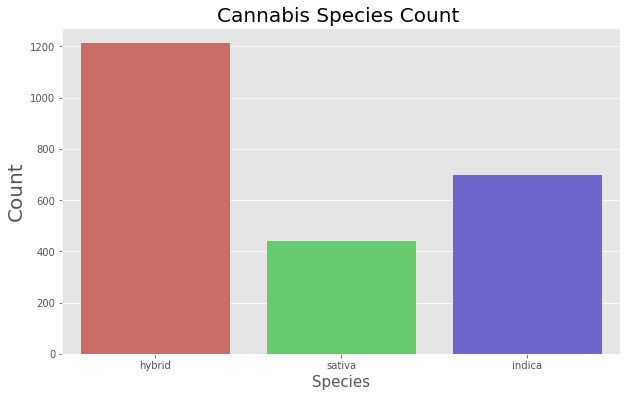

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x="Type", data=df, palette='hls')
plt.xlabel('Species', fontsize=15)
plt.ylabel('Count', fontsize=20)
plt.title("Cannabis Species Count ", fontsize=20)
plt.show()

Top 10 Rating by consumers
4.5    317
4.3    297
4.4    284
4.6    242
4.2    225
5.0    210
4.7    164
4.8    159
4.0    104
4.1    101
Name: Rating, dtype: int64


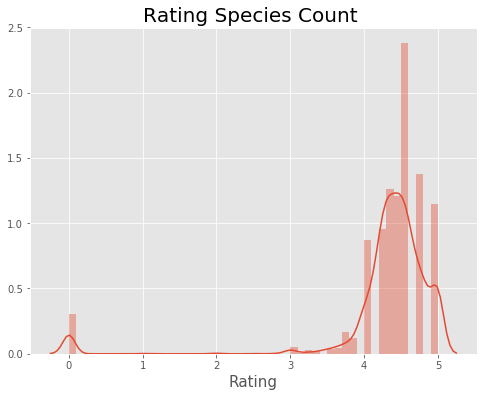

In [27]:
print("Top 10 Rating by consumers")
print(df["Rating"].value_counts().head(10))

plt.figure(figsize=(8,6))

#Total rating distribuition
sns.distplot(df.Rating)
plt.xlabel('Rating', fontsize=15)
plt.title("Rating Species Count ", fontsize=20)
plt.show()

Top 10 Rating by consumers
4.5    164
4.3    150
4.4    144
4.6    114
4.2    113
5.0    102
4.7     95
4.8     88
4.0     62
4.1     56
Name: Rating, dtype: int64


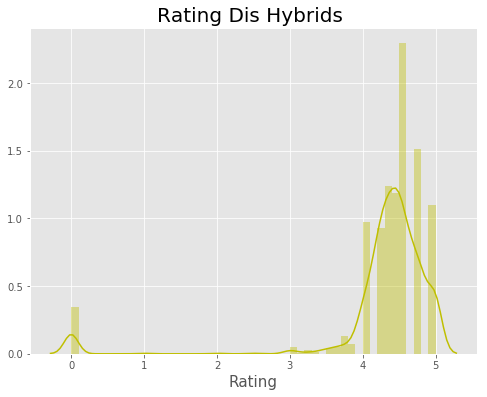

In [46]:
print("Top 10 Rating by consumers")
df1 = df[df['Type']=='hybrid']
print(df1["Rating"].value_counts().head(10))

plt.figure(figsize=(8,6))

#Total rating distribuition
sns.distplot(df1.Rating,color='y')
plt.xlabel('Rating', fontsize=15)
plt.title("Rating Dis Hybrids ", fontsize=20)
plt.show()

Top 10 Rating by consumers
4.5    59
4.3    58
4.4    57
4.6    50
4.2    48
5.0    38
4.8    30
4.7    22
4.0    18
0.0    13
Name: Rating, dtype: int64


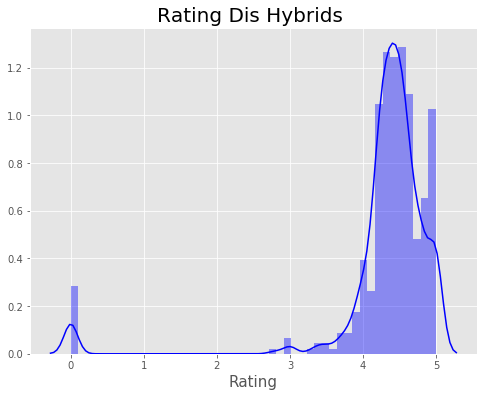

In [47]:
print("Top 10 Rating by consumers")
df1 = df[df['Type']=='sativa']
print(df1["Rating"].value_counts().head(10))

plt.figure(figsize=(8,6))

#Total rating distribuition
sns.distplot(df1.Rating,color='b')
plt.xlabel('Rating', fontsize=15)
plt.title("Rating Dis Hybrids ", fontsize=20)
plt.show()

Top 10 Rating by consumers
4.5    94
4.3    89
4.4    83
4.6    78
5.0    70
4.2    64
4.7    47
4.8    41
4.1    33
4.0    24
Name: Rating, dtype: int64


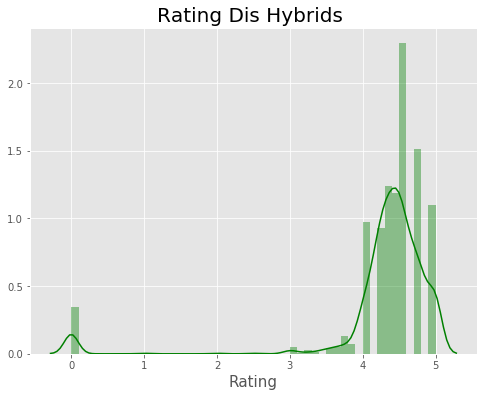

In [48]:
print("Top 10 Rating by consumers")
df1 = df[df['Type']=='indica']
print(df1["Rating"].value_counts().head(10))

plt.figure(figsize=(8,6))
df1 = df[df['Type']=='hybrid']

#Total rating distribuition
sns.distplot(df1.Rating,color='g')
plt.xlabel('Rating', fontsize=15)
plt.title("Rating Dis Hybrids ", fontsize=20)
plt.show()

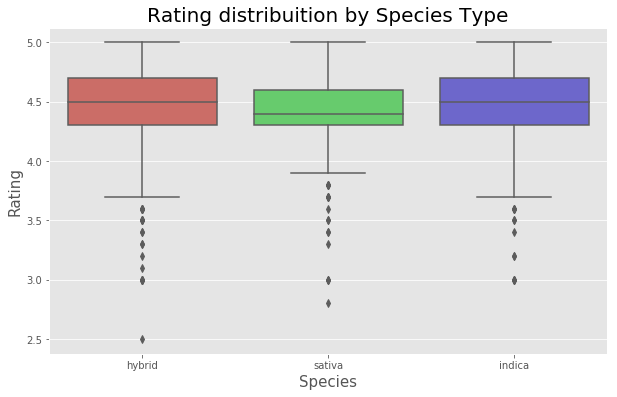

In [51]:
plt.figure(figsize=(10,6))
#I will now explore the Rating distribuition by Type
sns.boxplot(x="Type",y="Rating",data=df[df["Rating"] > 2],palette="hls")
plt.title("Rating distribuition by Species Type", fontsize=20)
plt.xlabel("Species", fontsize=15)
plt.ylabel("Rating", fontsize=15)
plt.show()

In [113]:
df_effect = pd.DataFrame(df.Effects.str.split(',',4).tolist(),
             columns = ['Effect_1','Effect_2','Effect_3','Effect_4','Effect_5'])
df_flavors = pd.DataFrame(df.Flavor.str.split(',',n=2,expand=True).values.tolist(),
                          columns = ['Flavor_1','Flavor_2','Flavor_3'])

In [116]:
df = pd.concat([df, df_effect], axis=1)
df = pd.concat([df, df_flavors], axis=1)

The top 5 First Effects related
Relaxed     825
Happy       476
Euphoric    249
Uplifted    244
Sleepy       89
Name: Effect_1, dtype: int64


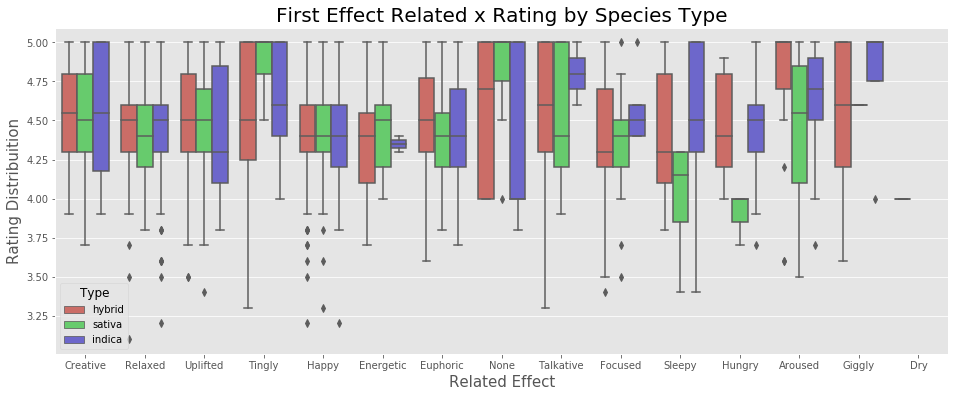

In [121]:
print("The top 5 First Effects related")
print(df['Effect_1'].value_counts()[:5])

plt.figure(figsize=(16,6))

sns.boxplot(x = 'Effect_1', y="Rating",
                hue="Type",
                data=df[df["Rating"] > 3],
                palette="hls")
plt.xlabel("Related Effect", fontsize=15)
plt.ylabel("Rating Distribuition", fontsize=15)
plt.title("First Effect Related x Rating by Species Type",fontsize=20)

plt.show()

The top 5 Second related Effects
Happy       571
Relaxed     351
Euphoric    342
Uplifted    321
Sleepy      197
Name: Effect_2, dtype: int64


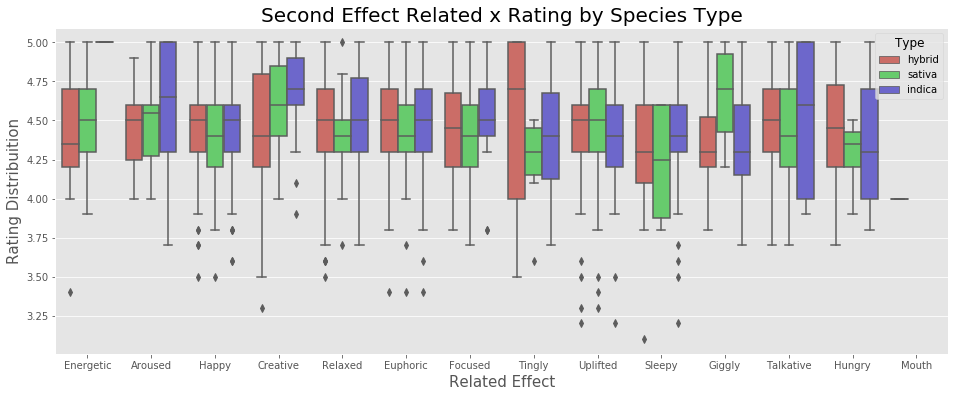

In [123]:
print("The top 5 Second related Effects")
print(df['Effect_2'].value_counts()[:5])

plt.figure(figsize=(16,6))

g = sns.boxplot(x = 'Effect_2', y="Rating",
                hue="Type",
                data=df[df["Rating"] > 3],
                palette="hls")
g.set_xlabel("Related Effect", fontsize=15)
g.set_ylabel("Rating Distribuition", fontsize=15)
g.set_title("Second Effect Related x Rating by Species Type",fontsize=20)

plt.show()

TOP 10 Flavors related
Earthy          531
Sweet           414
Citrus          188
Berry           124
None            110
Diesel          108
Pungent          87
Spicy/Herbal     67
Lemon            67
Blueberry        66
Name: Flavor_1, dtype: int64


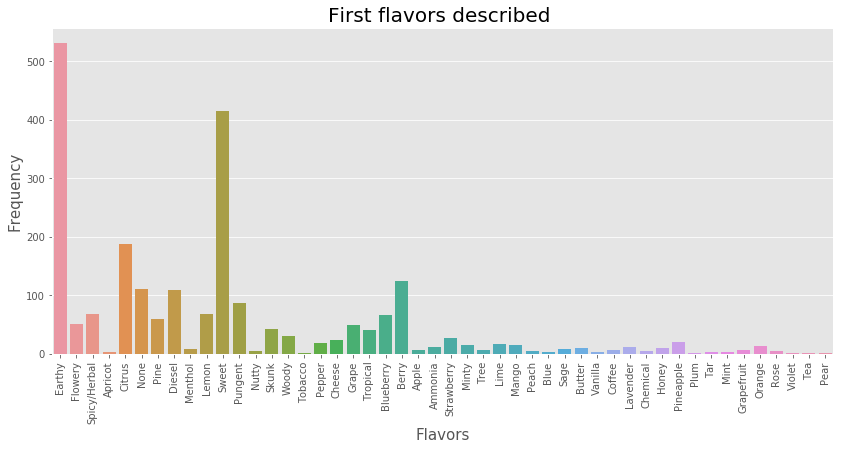

In [141]:
print("TOP 10 Flavors related")
print(df.Flavor_1.value_counts()[:10])

plt.figure(figsize=(14,6))
sns.countplot(df.Flavor_1,order = )
plt.xticks(rotation=90)
plt.xlabel('Flavors', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title("First flavors described ", fontsize=20)
plt.show()

Percentual of Species with Rating equal 5
hybrid porcentage 48.57142857142857
indica porcentage 33.33333333333333
sativa porcentage 18.095238095238095


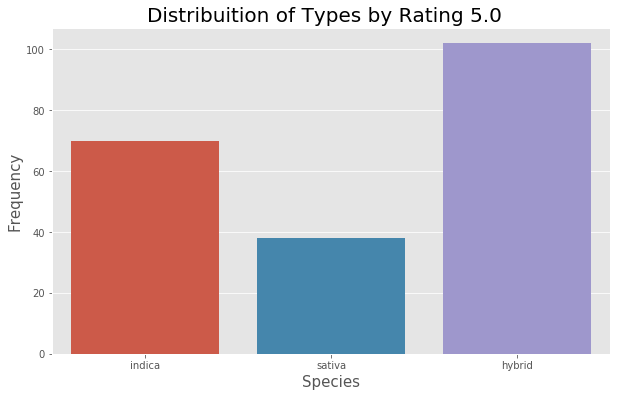

In [142]:
#Whats the type with most strains with rating 5?
df1 = df[df['Rating']==5]
print("Percentual of Species with Rating equal 5")
print('hybrid porcentage {}'.format(((df1.groupby('Type').size()[0])/(df1.groupby('Type').size()[0] 
+ df1.groupby('Type').size()[1] + df1.groupby('Type').size()[2]))*100))
print('indica porcentage {}'.format(((df1.groupby('Type').size()[1])/(df1.groupby('Type').size()[0] 
+ df1.groupby('Type').size()[1] + df1.groupby('Type').size()[2]))*100))
print('sativa porcentage {}'.format(((df1.groupby('Type').size()[2])/(df1.groupby('Type').size()[0] 
+ df1.groupby('Type').size()[1] + df1.groupby('Type').size()[2]))*100))
plt.figure(figsize=(10,6))
g = sns.countplot(x="Type",data=df1)
g.set_xlabel('Species', fontsize=15)
g.set_ylabel('Frequency', fontsize=15)
g.set_title("Distribuition of Types by Rating 5.0  ", fontsize=20)

plt.show()

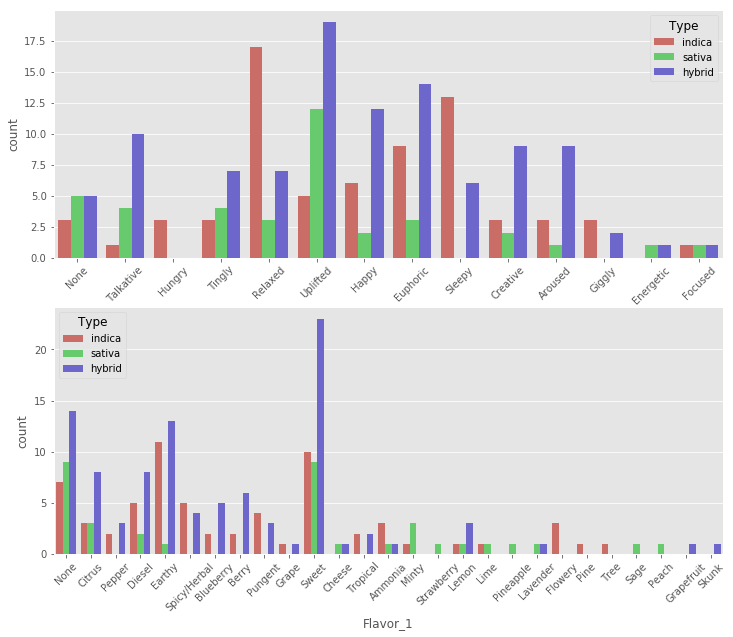

In [143]:
fig, ax = plt.subplots(2,1, figsize=(12,10))

sns.countplot(x ='Effect_1',data = df1,hue="Type",ax=ax[0], palette='hls')

sns.countplot(x ='Flavor_1',data = df1,hue="Type",ax=ax[1], palette='hls')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

In [146]:
#Let's create subsets by each type and explore their Flavors and Effects
hibridas = df[df.Type == 'hybrid']
indicas = df[df.Type == 'indica']
sativas = df[df.Type == 'sativa']
df.drop(['Effects','Flavor'],inplace=True,axis=1)

In [149]:
def get_effects(dataframe):
    ret_dict = {}
    for list_ef in dataframe.Effects:
        effects_list = list_ef.split(',')
        for effect in effects_list:
            if not effect in ret_dict:
                ret_dict[effect] = 1
            else:
                ret_dict[effect] += 1
    return ret_dict

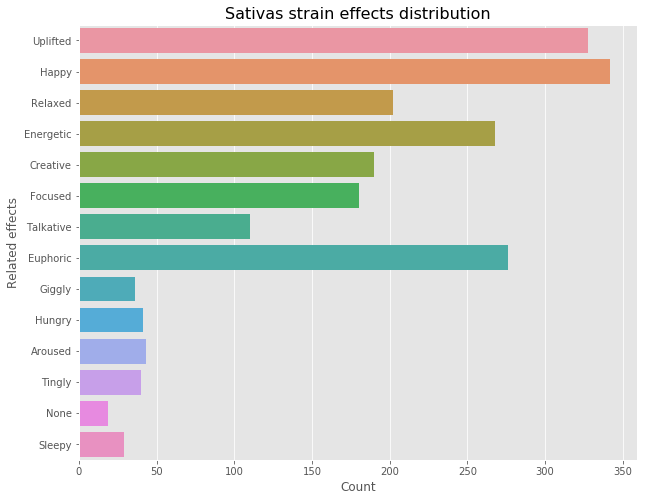

In [153]:
sativa_effects = get_effects(sativas)

#Let see the distribuition of effects by types
plt.figure(figsize=(10,8))
sns.barplot(list(sativa_effects.values()), list(sativa_effects.keys()), orient='h')
plt.xlabel("Count", fontsize=12)
plt.ylabel("Related effects", fontsize=12)
plt.title("Sativas strain effects distribution", fontsize=16)
plt.show()

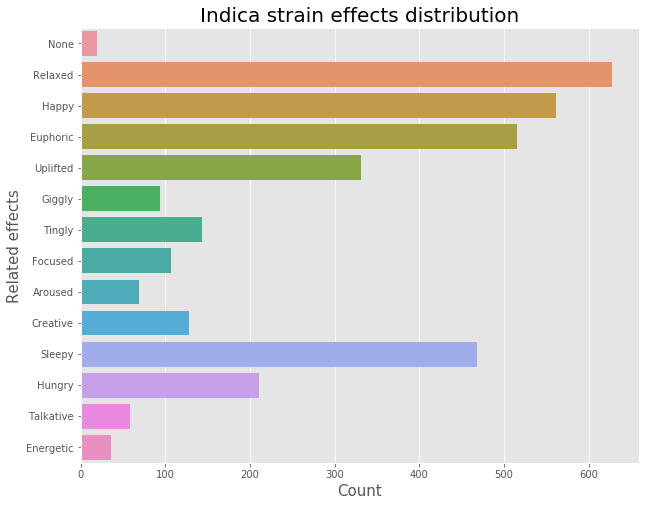

In [154]:
indica_effects = get_effects(indicas)

# Ploting Indica Effects
plt.figure(figsize=(10,8))
sns.barplot(list(indica_effects.values()),list(indica_effects.keys()), orient='h')
plt.xlabel("Count", fontsize=15)
plt.ylabel("Related effects", fontsize=15)
plt.title("Indica strain effects distribution", fontsize=20)
plt.show()

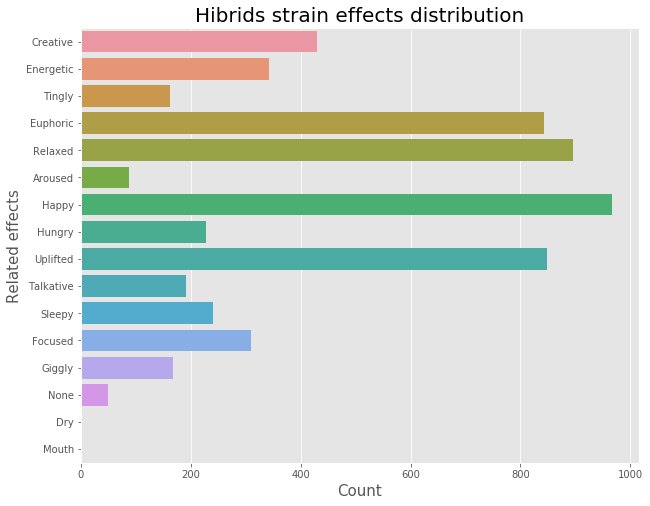

In [155]:
hibridas_effects = get_effects(hibridas)

# Ploting Hybrid effects
plt.figure(figsize=(10,8))
sns.barplot(list(hibridas_effects.values()),list(hibridas_effects.keys()), orient='h')
plt.xlabel("Count", fontsize=15)
plt.ylabel("Related effects", fontsize=15)
plt.title("Hibrids strain effects distribution", fontsize=20)
plt.show()

In [156]:
def flavors(df):
    ret_dict = {}
    for list_ef in df.Flavor.dropna():
        flavors_list = list_ef.split(',')
        for flavor in flavors_list:
            if not flavor in ret_dict:
                ret_dict[flavor] = 1
            else:
                ret_dict[flavor] += 1
    return ret_dict

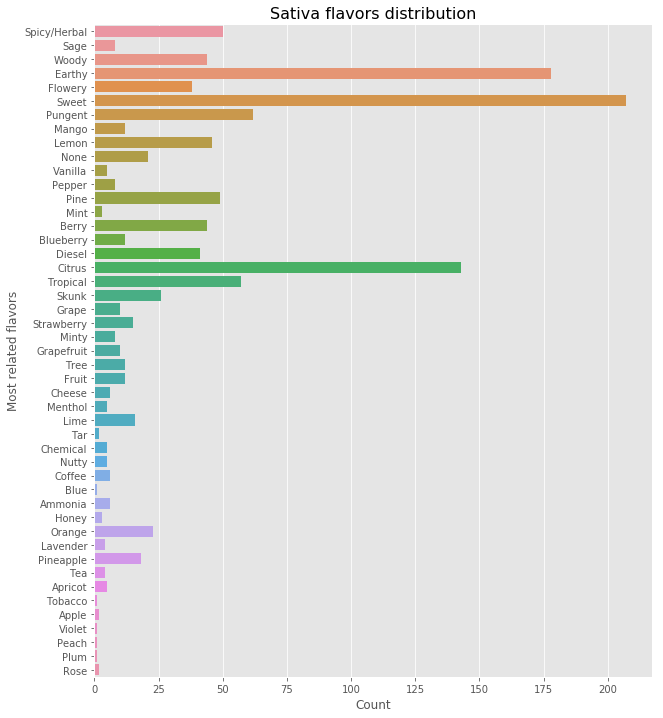

In [157]:
sativa_flavors = flavors(sativas)

plt.figure(figsize=(10,12))
sns.barplot(list(sativa_flavors.values()),list(sativa_flavors.keys()), orient='h')
plt.xlabel("Count", fontsize=12)
plt.ylabel("Most related flavors", fontsize=12)
plt.title("Sativa flavors distribution", fontsize=16)
plt.show()

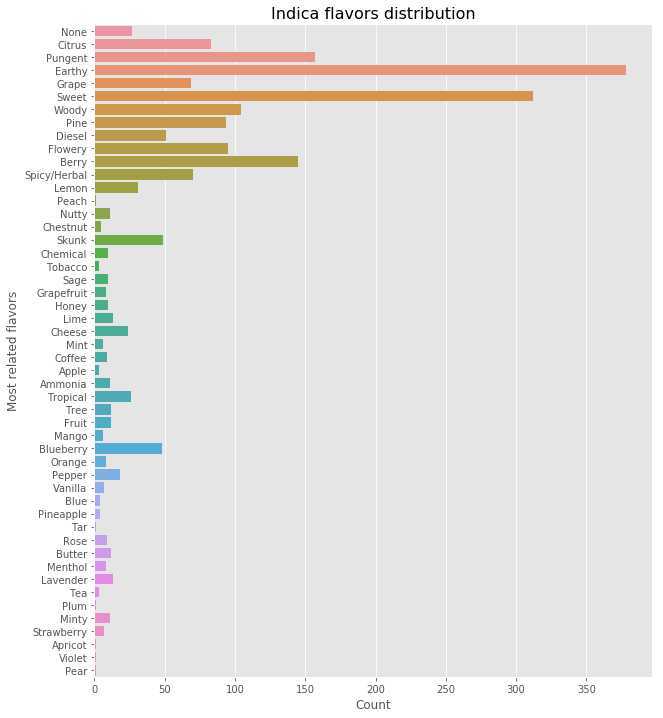

In [158]:
indica_flavors = flavors(indicas)

plt.figure(figsize=(10,12))
sns.barplot(list(indica_flavors.values()),list(indica_flavors.keys()), orient='h')
plt.xlabel("Count", fontsize=12)
plt.ylabel("Most related flavors",fontsize=12)
plt.title("Indica flavors distribution", fontsize=16)
plt.show()

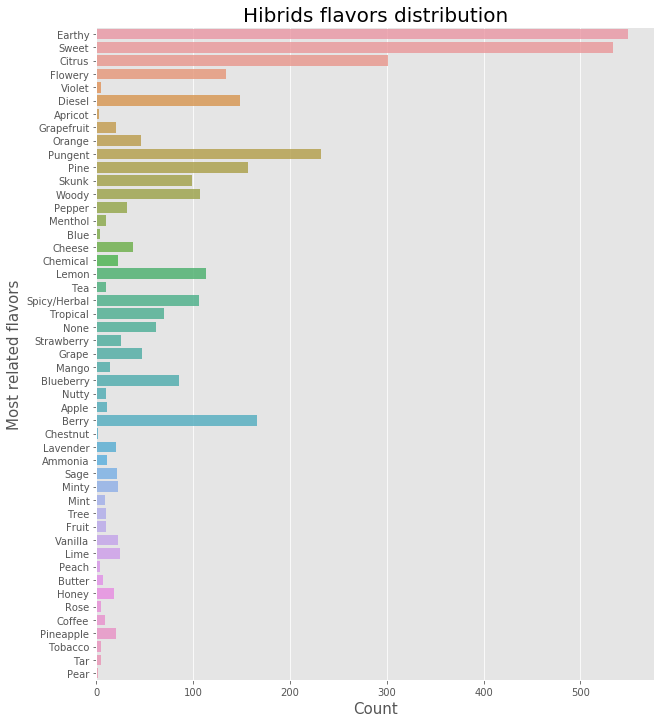

In [159]:
#Getting hibridas flavors
hibridas_flavors = flavors(hibridas)

plt.figure(figsize=(10,12))
sns.barplot(list(hibridas_flavors.values()),list(hibridas_flavors.keys()), alpha=0.8,orient='h')
plt.xlabel("Count", fontsize=15)
plt.ylabel("Most related flavors", fontsize=15)
plt.title("Hibrids flavors distribution", fontsize=20)
plt.show()

In [163]:
df.head()

,Strain,Type,Rating,Description,Effect_1,Effect_2,Effect_3,Effect_4,Effect_5,Flavor_1,Flavor_2,Flavor_3
0,100-Og,hybrid,4.0,$100 OG is a 50/50 hybrid strain that packs a ...,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus
1,98-White-Widow,hybrid,4.7,The ‘98 Aloha White Widow is an especially pot...,Relaxed,Aroused,Creative,Happy,Energetic,Flowery,Violet,Diesel
2,1024,sativa,4.4,1024 is a sativa-dominant hybrid bred in Spain...,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy/Herbal,Sage,Woody
3,13-Dawgs,hybrid,4.2,13 Dawgs is a hybrid of G13 and Chemdawg genet...,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit
4,24K-Gold,hybrid,4.6,"Also known as Kosher Tangie, 24k Gold is a 60%...",Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange


In [165]:
df["Type"] = pd.factorize(df["Type"])[0]
del df["Description"]

In [169]:
df = pd.get_dummies(df,columns = ['Effect_1','Effect_2','Effect_3','Effect_4','Effect_5','Flavor_1','Flavor_2','Flavor_3'])

In [171]:
df.shape

(2351, 233)

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [183]:
X = df.drop(["Type",'Strain'],axis=1).values
y = df["Type"].values

X = X.astype(np.float64, copy=False)
y = y.astype(np.float64, copy=False)
df.shape

(2351, 233)

# Random Forest

In [184]:
#Spliting the variables in train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Creating the RandomForest 
rf = RandomForestClassifier(n_estimators=10)

# running the model
rf.fit(X_train, y_train)

# Printing the Training Score
print("Training score data: ")
print(rf.score(X_test, y_test))

Training score data: 
0.556657223796034


In [187]:
print(rf.predict(X_test[:10]))
print(y_test[:10])

[0. 0. 0. 2. 0. 0. 2. 0. 1. 0.]
[0. 2. 1. 0. 0. 0. 2. 2. 0. 0.]


In [190]:
logreg = LogisticRegression()

# Running the model
logreg.fit(X, y)

# Printing the Training Score
print("Training score data: ")
print(logreg.score(X_test, y_test))

Training score data: 
0.6926345609065155


In [191]:
y_pred = logreg.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6926345609065155
[[303  20  50]
 [ 74  54   1]
 [ 68   4 132]]
             precision    recall  f1-score   support

        0.0       0.68      0.81      0.74       373
        1.0       0.69      0.42      0.52       129
        2.0       0.72      0.65      0.68       204

avg / total       0.69      0.69      0.68       706



In [192]:
score_train = cross_val_score(logreg, X, y_train, cv=5, scoring='accuracy',)
print(score_train.mean())

0.6133503730312241
